## Ultimate Inc Challange

Ultimate Technologies Inc. is an American worldwide online transportation network company that has disrupted the taxi and logistics industry and is a prestigious company to work at. This challenge has been adapted from an actual Ultimate Inc. data science challenge.

In [86]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
#import seaborn as sns

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#sns.set(font_scale=1.5, style="whitegrid")

In [87]:
# read in data
with open('logins.json', 'r') as f:
    logins_json = json.load(f)

In [88]:
#read json into dataframe
logins_df = pd.DataFrame.from_dict(logins_json['login_time'])
#rename column and covert data to datetime
logins_df.columns = ['time']
logins_df['time'] = pd.to_datetime(logins_df['time'])
logins_df

,time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [89]:
logins_df.describe()

,time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [90]:
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [91]:
#Add login count column and set time to index
logins_df['login_count'] = 1
logins_df.set_index('time', drop=True, inplace=True)
logins_df

,login_count
time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1
...,...
1970-04-13 18:50:19,1
1970-04-13 18:43:56,1
1970-04-13 18:54:02,1


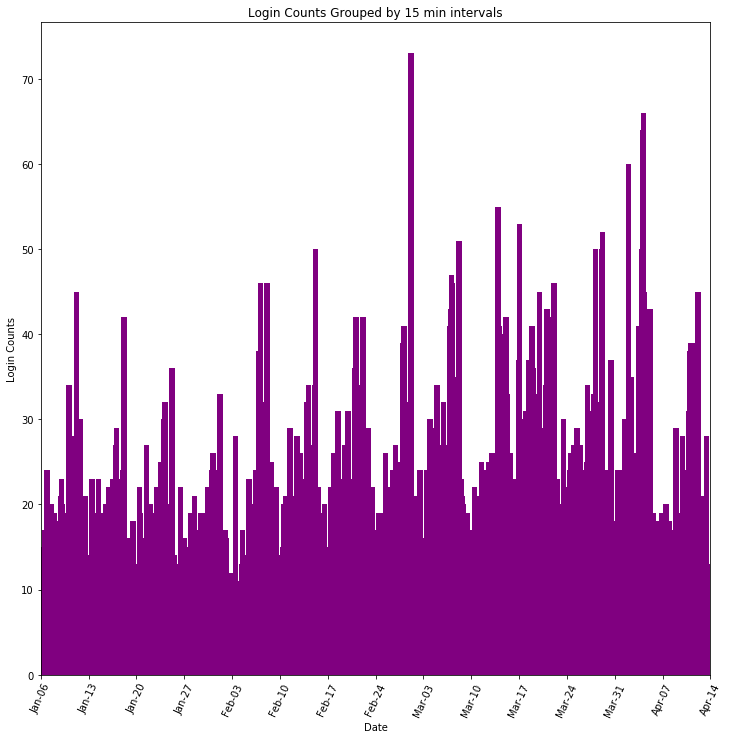

In [92]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar((logins_df['login_count'].resample('15T').sum()).index.values,
       (logins_df['login_count'].resample('15T').sum()),
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Login Counts",
       title = 'Login Counts Grouped by 15 min intervals',
      xlim=["1970-01-06", "1970-04-14"])

# Define the date format
date_form = DateFormatter("%b-%d")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each 2 weeks using (interval=1) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.xticks(rotation=65)

plt.show()

Aggregating the login counts based on 15 minute time intervals shows there are cyclical peaks and drops occuring each week. Our first data point - January 6th 1970 is a Tuesday making it hard to intuitively assess which days have higher login count or when during the week the peak happens- we investigate that further below.
The biggest spike for login counts happened on the last week of February with over 70 counts. The lowest login counts (10) happened at the beggining of February.

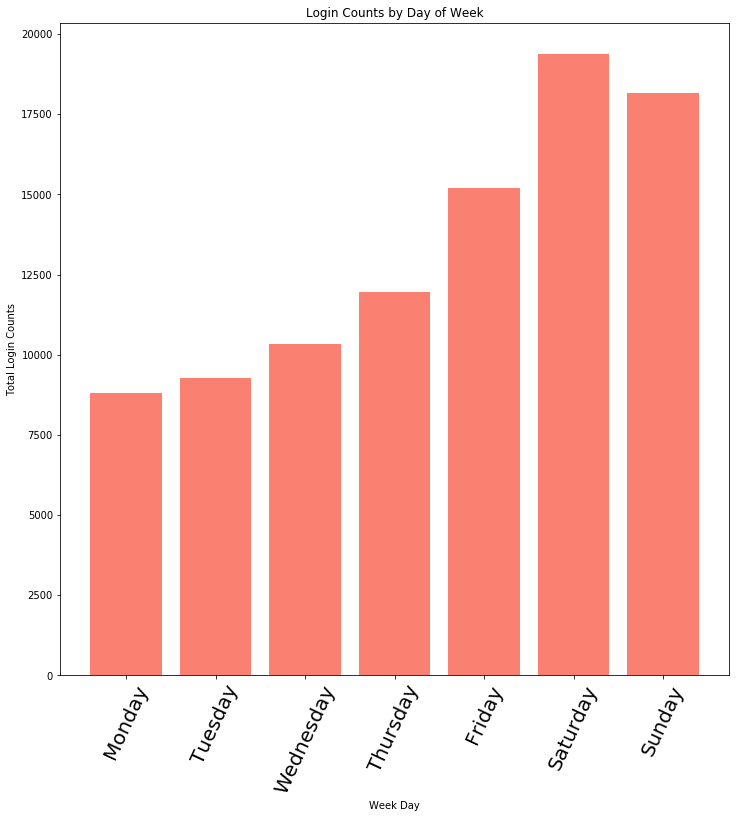

In [93]:
#Aggregate data by week day
login_weekday_sum = logins_df.groupby([logins_df.index.dayofweek]).sum()['login_count']

# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(login_weekday_sum.index,
       login_weekday_sum.values,
       color='salmon')


# Set title and labels for axes
ax.set(xlabel="Week Day",
       ylabel="Total Login Counts",
       title = 'Login Counts by Day of Week')
       
xtickslabels = ['', 'Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax.set_xticklabels(xtickslabels, fontsize=20)
plt.xticks(rotation=65)

plt.show()

It can be noted that the peak number of logins occurs on Saturdays and Sundays. With the lowest number of logins happening on Monday and progressvily increasing  throughout the week. Next we explore the login distribution per hour of day.

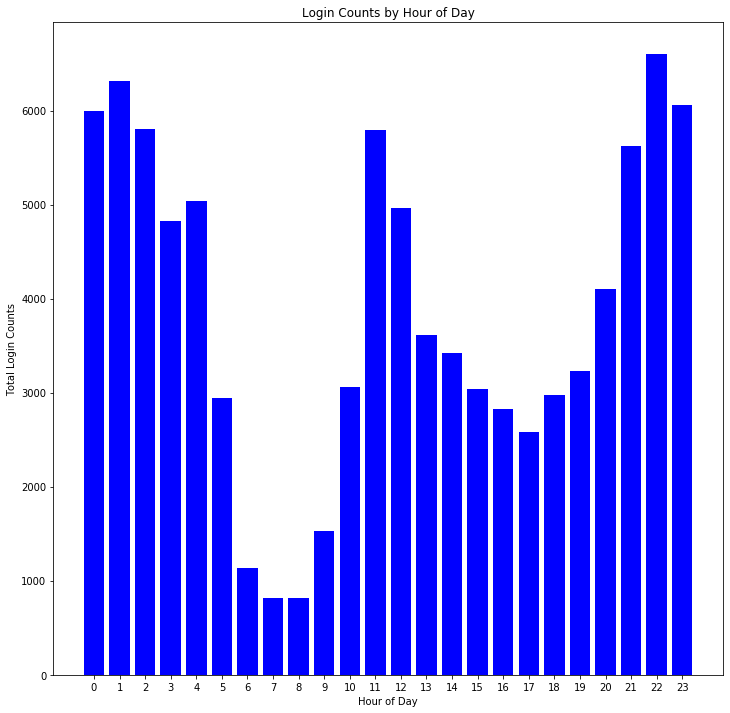

In [94]:
#Aggregate data by hour of day
login_hourly_sum = logins_df.groupby([logins_df.index.hour]).sum()['login_count']

# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(login_hourly_sum.index,
       login_hourly_sum.values,
       color='blue')


# Set title and labels for axes
ax.set(xlabel="Hour of Day",
       ylabel="Total Login Counts",
       title = 'Login Counts by Hour of Day')
       
ax.set_xticks(range(0,24))
#plt.xticks(rotation=65)

plt.show()

It can be noted there two main peaks of login activity throughout the day, one at 10 pm and another at 11am. With the lowest number of logins happening from 6am-9am.

## Part 2 ‑ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

<i>The key metric I would choose is the percentage of drivers that become available in both cities at any point on a given week. I wold choose this metric because it would clearly show whether the incentive had an impact on drivers being available in both cities (the key metric). Given the information that the demand is cyclical on a weekly basis and drivers would be most likely to commute to the other city at periods of low demand in their own city, the weekly average should be sufficient to capture this behavior. 

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

a. how you will implement the experiment

<i>An A/B test could be implemented in which the drivers are randomly divided into two groups: one group would receive the toll reimbursement incentive and the other would not. Data would be collected for all the drivers on whether they were available for rides in both cities or not at any point during a given week. The experiment would ideally be run over a period of several weeks and could be extended depending on budget constraints, timelines and number of existing drivers so as to increase data and confidence once the results are analyzed.

b. what statistical test(s) you will conduct to verify the significance of the
observation

<i>We can use a Chi-square test in which the relationship between the toll incentive being given or not and the proportion of drivers available in both cities is tested.

c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

<i>The chi-squared statistic will be computed based on the expected vs. observed frequencies of the number of drivers serving both cities for both groups (the group provided with the toll incentive and the control group). Using a p-value of 0.05 would provide us with at least a 95% confidence level that a relationship in fact exists (or not) between the toll incentive and the percentage of drivers serving both cities. 
If the chi square statistic is large enough and hence indicative the toll incentive was sucessful in encouraging driver partners to be available in both cities my recommendation to the city operations team would be:

1) First evaluate whether this increased availability was profitable: the toll costs should be offset by the increased number of rides resulting from the driver availability. This can be calculated using cost/revenue information from both groups in the experiment.

2) If the first condition is met the toll incentive should be expanded to include more (or all) drivers.

If no evidence of a relationship between the toll incentive and percentage of drivers serving both cities exists and no other benefit can be observed from the experiment then the toll incentive can be discontinued. 


## Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).

<b>Data description</b>

● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYY MM DD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday

In [95]:
# read in data
with open('ultimate_data_challenge.json', 'r') as f:
    ultimate_data_json = json.load(f)

In [96]:
#read json into dataframe
ultimate_df = pd.DataFrame.from_dict(ultimate_data_json)
ultimate_df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [97]:
ultimate_df.dtypes #check data types

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [98]:
ultimate_df.info()#use info summary to check for NaNs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [99]:
#Convert dates to datetime 
ultimate_df['signup_date'] = pd.to_datetime(ultimate_df['signup_date'])
ultimate_df['last_trip_date'] = pd.to_datetime(ultimate_df['last_trip_date'])
ultimate_df.dtypes

city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
dtype: object

In [100]:
ultimate_df.describe() 

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [101]:
# Inspect possible outliers
ultimate_df[ultimate_df['avg_dist'] == ultimate_df['avg_dist'].max()]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
20701,Astapor,0,2014-01-25,NaN,1.0,2014-06-26,Android,0.0,False,100.0,160.96,NaN


In [104]:
# The record above is a possible outlier but will be removed later due to the presence of NaNs

In [105]:
#Figure out when data was pulled
ultimate_df['last_trip_date'].max()

Timestamp('2014-07-01 00:00:00')

In [106]:
#Users can be considered active if last trip date was taken after 2014-06-01
ultimate_df['active']  = (ultimate_df['last_trip_date'] > '2014-06-01')
ultimate_df['active'].mean()

0.3662

36.62% of users where retained based on active status in the 30 days preceding 07/01/2014.

<b>2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve, auc

#Encode phone data and location data to numerical

ultimate_df['iPhone']=pd.get_dummies(ultimate_df['phone'], drop_first=True)

#encode city data to numerical with label encoder
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(ultimate_df['city'])
label_encoded = label_encoder.transform(ultimate_df['city'])
ultimate_df['city'] = label_encoded

# Select columns for features and target
features = ['city', 'trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct',
            'ultimate_black_user', 'weekday_pct', 'avg_dist','avg_rating_by_driver', 'iPhone']

ultimate_df.dropna(inplace=True)#dropping rows with missing data (driver rating and rating by driver)

X = ultimate_df[features]
y = ultimate_df['active'].values.ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


#Random Search CV

n_estimators = np.arange(100,600,100)
max_depth = [1,2,4,8]
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]

param_dist = {'n_estimators': n_estimators, 'max_depth':max_depth, 'learning_rate':learning_rate}

gbm = GradientBoostingClassifier()

#Instantiate the RandomSearchCV object: 
gbm_cv = RandomizedSearchCV(gbm, param_distributions = param_dist, cv=5, scoring='roc_auc', n_iter=30)

#Fitting the model
gbm_cv.fit(X_train, y_train)

print("Tuned Gradient Boosting Parameters: {}".format(gbm_cv.best_params_)) 
print("Best score is {}".format(gbm_cv.best_score_))

Tuned Gradient Boosting Parameters: {'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.1}
Best score is 0.8585086648081154


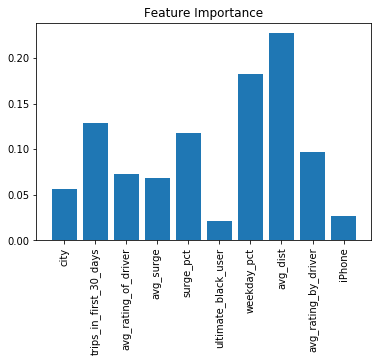

In [107]:
plt.bar(features, gbm_cv.best_estimator_.feature_importances_)
plt.xticks(rotation=90)
plt.title('Feature Importance');

The most import predictive feature is avg_distance followed by weekday percentage and number of trips in the first 30 days.

The gradient boosting model was selected due to its overall ease of use and good overall performance, additionally it can handle numerical and categorical features with ease and has multiple hyperpameter tuning options. Some alternatives to be considered would be a logistic regression model, as well as further optimizing the GBM model by varying features sets and dropping variables with less importance (such as ultimate_black_user status). 

The AUC ROC score of 0.85 confirms the model has predictive power. The model can be tailored to prioritize precision, recall or consider both with equal weights by varying the classification threshold. For Ultimate, identifying all of the customers likely to stop using the service should be preferred to atempting to minize false positives so as to increase overall customer retention and utilization. While precision is important, for this case lower precision scores would not present a high risk to the company - customers already likely to stay might even increase their usage of the service if presented with a discount or other incentive. This can be verified by deploying the model on a subset of customers initially.

With this in mind, the F2 score (placing importance on recall) will be used as a metric below to select an appropriate threshold for model classification. 

In [108]:
from sklearn.metrics import confusion_matrix, fbeta_score

def precision_recall(model, X_test, y_test, threshold, beta = 1):
    
    y_pred = (model.predict_proba(X_test)[:,1] >= threshold).astype(bool)
    matrix = confusion_matrix(y_test, y_pred)

    tn = matrix[0,0]
    tp = matrix[1,1]
    fp = matrix[0,1]
    fn = matrix[1,0]
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    f_beta = fbeta_score(y_test, y_pred, beta=beta)
    
    return([precision, recall, f_beta])

In [109]:
threshold_df = pd.DataFrame(columns=['Precision','Recall','F2_measure'])

for threshold in np.arange(0.0,0.99,.01):
    
    threshold_df.loc[threshold] = precision_recall(gbm_cv.best_estimator_, X_test, y_test, threshold, beta = 2)

In [110]:
print('Threshold for best F2 score:')
threshold_df[threshold_df['F2_measure'] == threshold_df['F2_measure'].max()]

Threshold for best F2 score:


,Precision,Recall,F2_measure
0.13,0.536255,0.958094,0.82785


In [111]:
y_pred = (gbm_cv.best_estimator_.predict_proba(X_test)[:,1] >= 0.13).astype(bool)
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[2726, 3460],
       [ 175, 4001]], dtype=int64)

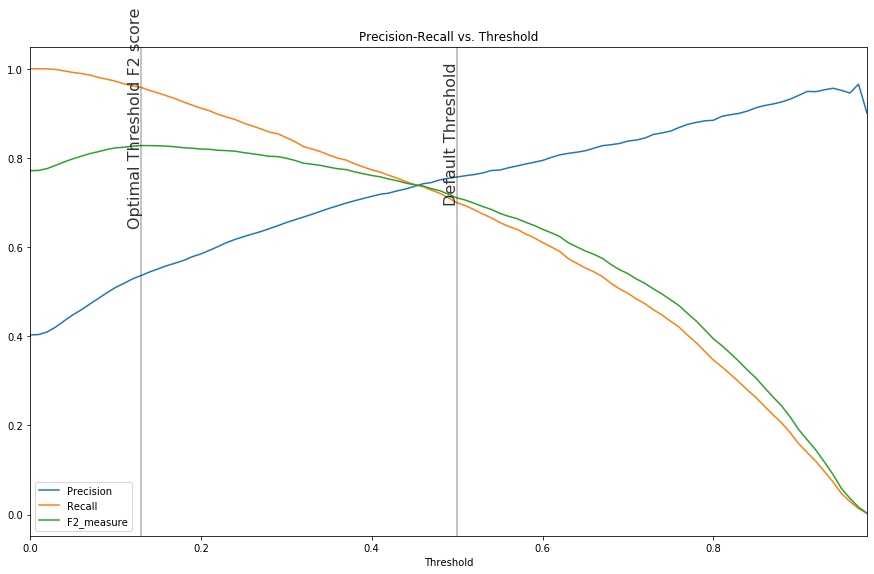

In [112]:
ax = threshold_df.plot(figsize=(15,9))
ax.set_xlabel('Threshold')
ax.set_title('Precision-Recall vs. Threshold')
ax.axvline(0.13, color='black', alpha=0.3)
ax.text(.115,.65,'Optimal Threshold F2 score',rotation=90, alpha=0.8, fontsize=16)

ax.axvline(0.5, color ='black', alpha = 0.3)
ax.text(.485,.7,'Default Threshold',rotation=90, alpha=0.8,fontsize=16);

Using a threshold of 0.13, an F2 score of 0.83 is achieved, with a recall score of 0.958 and a precision score of 0.536.

<b>3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).</b>

By employing the model to identify those customers likely to churn Ultimate can target them with offers or discounts. The high recall score means about 96% of customers likely to stop using the service would be identified. With more time, different models could be explored to try to improve both recall and precision.